# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

With a Car's dataset given, the business goal is to understand the attributes that impact sales price of used cars and be able to predict the car prices. From the data standpoint, The objective is 
  1. Identity the top features that influence the car price
  2. Build a predictive model with those features.
We will use various data cleansing and machine learning techniques to identify the same.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Plot libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor


#set the plot size to 14" x 4"
plt.rcParams['figure.figsize'] = (18,5)

In [2]:
# Let's load the data
df = pd.read_csv('data/vehicles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.sample(10).head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
33133,7316731517,los angeles,16990,2016.0,jeep,patriot latitude sport,good,NaN,gas,52987.0,clean,other,1C4NJPFA1GD794389,fwd,NaN,other,NaN,ca
336862,7311915865,pittsburgh,35590,2019.0,honda,ridgeline rtl-t pickup 4d,good,NaN,other,13911.0,clean,other,5FPYK2F60KB007255,NaN,NaN,pickup,black,pa
33518,7316547486,los angeles,1800,2000.0,honda,accord,good,4 cylinders,gas,165684.0,clean,automatic,NaN,fwd,NaN,coupe,silver,ca
204534,7311313113,kalamazoo,11900,2015.0,chevrolet,equinox,good,4 cylinders,gas,121400.0,clean,automatic,2GNFLFEK8F6298951,4wd,NaN,wagon,black,mi
133433,7316969006,east idaho,27900,2014.0,chevrolet,silverado 1500 lt,excellent,NaN,gas,85054.0,clean,automatic,1GCVKREC6EZ348797,4wd,full-size,truck,white,id


In [5]:
# Check for missing values

missing_values = (df.isna().mean() * 100).reset_index().rename(columns={"index": "Features", 0: "Missing %"})
missing_values["Missing %"] = round(missing_values["Missing %"])

missing_values

,Features,Missing %
0,id,0.0
1,region,0.0
2,price,0.0
3,year,0.0
4,manufacturer,4.0
5,model,1.0
6,condition,41.0
7,cylinders,42.0
8,fuel,1.0
9,odometer,1.0


In [6]:
# Looking at the sample above, there are columns with nulls.. Check for nulls and remove nulls.
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


,price
count,4.268800e+05
mean,7.519903e+04
std,1.218228e+07
min,0.000000e+00
25%,5.900000e+03
50%,1.395000e+04
75%,2.648575e+04
max,3.736929e+09


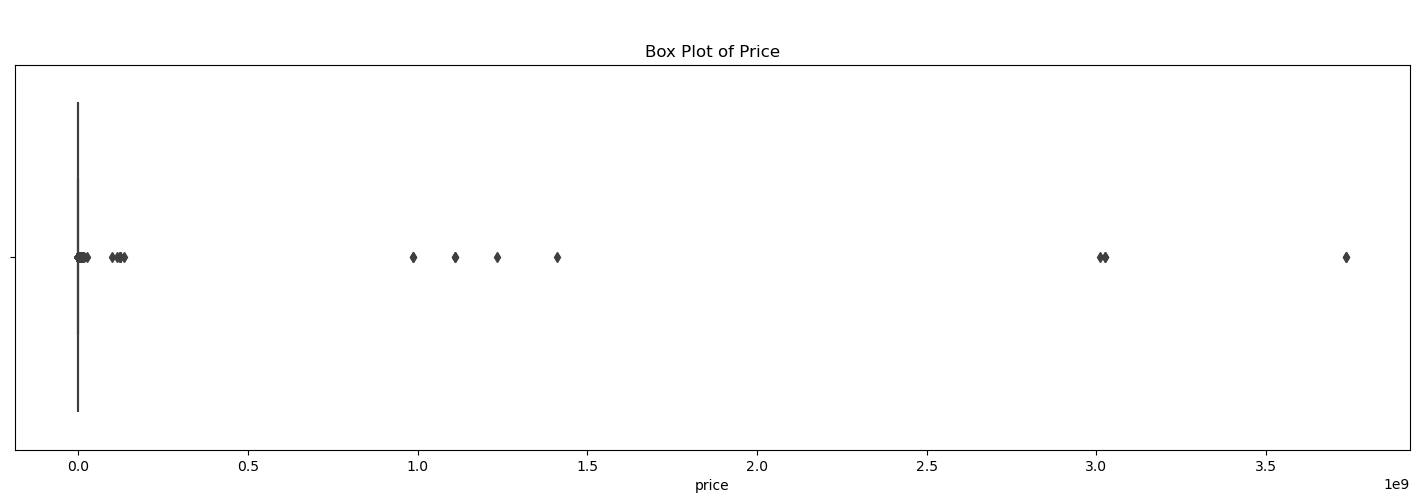

In [7]:
# Check for outliers in numeric columns
sns.boxplot(x=df["price"]);
plt.title("\n\nBox Plot of Price");
df.describe()[["price"]]

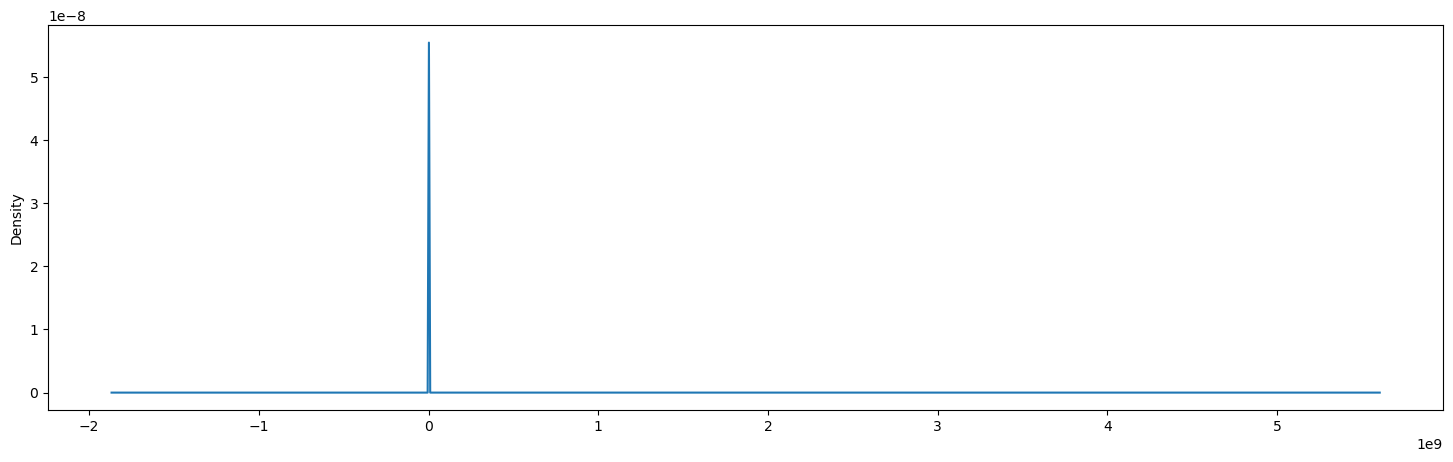

In [8]:
 df["price"].plot(kind="kde");

In [9]:
# Let's look at avg price by each category columns:
"""
category_columns = ["region","year", "model",  "manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
fig, axs = plt.subplots(7, 2, figsize=(18, 15));

row=0
col=0
for index, column in enumerate(category_columns):
    axis = axs[row, col]
    sns.barplot(x=column, y='price', data=df, ax=axis);
    axis.set_title(f'Avg. Price by {category_columns[index]}!')
    col = col+1
    if(col>1): 
        row=row+1
        col=0
fig.tight_layout()
plt.show()
"""

'\ncategory_columns = ["region","year", "model",  "manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]\nfig, axs = plt.subplots(7, 2, figsize=(18, 15));\n\nrow=0\ncol=0\nfor index, column in enumerate(category_columns):\n    axis = axs[row, col]\n    sns.barplot(x=column, y=\'price\', data=df, ax=axis);\n    axis.set_title(f\'Avg. Price by {category_columns[index]}!\')\n    col = col+1\n    if(col>1): \n        row=row+1\n        col=0\nfig.tight_layout()\nplt.show()\n'

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [10]:
# Set Id as index
df = pd.read_csv('data/vehicles.csv').dropna()
df.set_index("id", inplace=True)

In [11]:
# Convert cylinders to numeric
df['cylinders'].value_counts()
df['cylinders'] = df['cylinders'].str.replace("cylinders","").str.replace("other", "0").str.strip().astype(int)
df['cylinders'].value_counts()

cylinders
6     11618
4     11302
8     10928
10      565
5       281
0        96
3        67
12       11
Name: count, dtype: int64

In [12]:
# Check transmission
df.transmission.value_counts()

transmission
automatic    32476
manual        1693
other          699
Name: count, dtype: int64

In [13]:
# Convert Electric cars cylinders to 0
df.loc[df["fuel"] == "electric", "cylinders"] = df.loc[df["fuel"] == "electric", "cylinders"].fillna("0")

# Also convery cylinders to int
df["cylinders"] = df["cylinders"].astype("int")

In [14]:
# Since we have id, we can remove VIN
df = df.drop(columns=['VIN'])

In [15]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [16]:
imputer = SimpleImputer(strategy='most_frequent')

df_imputed_cat = pd.DataFrame(imputer.fit_transform(df.select_dtypes("object")), columns=df.select_dtypes("object").columns)

df_imputed_cat.head()

,region,manufacturer,model,condition,fuel,title_status,transmission,drive,size,type,paint_color,state
0,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al
1,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al
2,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al
3,birmingham,toyota,echo,excellent,gas,clean,automatic,fwd,compact,sedan,blue,al
4,birmingham,bmw,525i,fair,gas,clean,automatic,rwd,mid-size,sedan,white,al


In [17]:
imputer = KNNImputer(n_neighbors=2)

df_imputed_num = pd.DataFrame(imputer.fit_transform(df.select_dtypes(["int", "float"])), columns=df.select_dtypes(["int", "float"]).columns)
df_imputed_num

,price,year,cylinders,odometer
0,0.0,2018.0,6.0,68472.0
1,0.0,2019.0,6.0,69125.0
2,0.0,2018.0,6.0,66555.0
3,4000.0,2002.0,4.0,155000.0
4,2500.0,1995.0,6.0,110661.0
...,...,...,...,...
30227,23995.0,2013.0,8.0,114215.0
30228,15999.0,2000.0,6.0,199090.0
30229,24995.0,2014.0,8.0,128722.0
30230,6800.0,1997.0,8.0,69550.0


In [18]:
df_imputed = pd.concat([df_imputed_cat, df_imputed_num], axis=1)
df_imputed.head()

,region,manufacturer,model,condition,fuel,title_status,transmission,drive,size,type,paint_color,state,price,year,cylinders,odometer
0,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al,0.0,2018.0,6.0,68472.0
1,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al,0.0,2019.0,6.0,69125.0
2,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al,0.0,2018.0,6.0,66555.0
3,birmingham,toyota,echo,excellent,gas,clean,automatic,fwd,compact,sedan,blue,al,4000.0,2002.0,4.0,155000.0
4,birmingham,bmw,525i,fair,gas,clean,automatic,rwd,mid-size,sedan,white,al,2500.0,1995.0,6.0,110661.0


In [19]:
# Reduce variation in prices.
df_imputed = df_imputed.query("1000 < price < 60_000").copy()

# Reduce variation in odometer.
df_imputed = df_imputed.query("1_000 < odometer < 300_000").copy()

df_imputed.drop(df_imputed.query("title_status == 'parts only'").index, inplace=True)
df_imputed["condition"] = df_imputed["condition"].str.replace("like new", "like_new")

df_imputed.year = df_imputed.year.astype("object")
df_imputed.year = df_imputed.year.astype("int")

# Region/state don't seem to impact the price... removing them.
#df_imputed= df_imputed.drop(columns=['region', 'state', 'model', 'paint_color'])


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [20]:
df_imputed.dtypes

region           object
manufacturer     object
model            object
condition        object
fuel             object
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
price           float64
year              int64
cylinders       float64
odometer        float64
dtype: object

In [27]:
df_imputed.drop(columns=["size", "region", "paint_color", "model"], inplace=True)

In [28]:
obj_cols = df_imputed.select_dtypes("object").columns.to_list()
obj_cols.remove('condition')
obj_cols


['manufacturer',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'state']

In [29]:
df_imputed.manufacturer.value_counts()

# Remove less entries manufacturers
man_less_than10 = df_imputed.manufacturer.value_counts().apply(lambda x: x < 10).reset_index().query("count == True")["manufacturer"].values
df_imputed.drop(df_imputed.query("manufacturer in @man_less_than10").index, inplace=True)

In [30]:
df_imputed.manufacturer.value_counts()

manufacturer
ford             5876
chevrolet        3993
toyota           2268
honda            1537
nissan           1298
ram              1189
gmc              1112
jeep             1073
subaru            750
dodge             729
bmw               663
mercedes-benz     625
volkswagen        615
hyundai           613
kia               473
lexus             468
chrysler          420
cadillac          360
audi              332
mazda             331
buick             315
mitsubishi        273
acura             211
volvo             195
lincoln           188
infiniti          177
pontiac           177
mini              149
rover             120
porsche           100
saturn             86
mercury            76
jaguar             74
fiat               41
alfa-romeo         13
tesla              10
Name: count, dtype: int64

In [31]:
# Create Test & Train Data
X = df_imputed.drop(columns="price")
y = df_imputed["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


# 1. Linear Regression

In [56]:
# Model 1: Linear Regression with 92 features

train_mse = []
test_mse = []
explained_variance = []
model =[]


col_transformer_lr = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(), obj_cols),
    ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=1, include_bias=False), ["cylinders", "odometer", "year"])
])

linear_reg_model1 = Pipeline([
    ('transform', col_transformer_lr),
    ('scale', StandardScaler(with_mean=False)),
    ('linreg', LinearRegression())
])

linear_reg_model1.fit(X_train, y_train)

linear_reg_train_mse1= round(mean_squared_error(linear_reg_model1.predict(X_train), y_train), 4)
linear_reg_test_mse1=round(mean_squared_error(linear_reg_model1.predict(X_test), y_test),4)
linear_reg_EV1 = explained_variance_score(y_train, linear_reg_model1.predict(X_train))

train_mse.append(linear_reg_train_mse1)
test_mse.append(linear_reg_test_mse1)
explained_variance.append(linear_reg_EV1)
model.append("Model 1 - Linear Regression")

/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/dp/rbxn103d22s51s7mg1hyjn5m0000gp/T/ipykernel_38819/2962979064.py:3: RuntimeWarning: overflow encountered in exp
  plt.scatter(X_train['year'], np.exp(linear_reg_model1.predict(X_train)), c ="orange", alpha=0.3, label = 'predicted value')


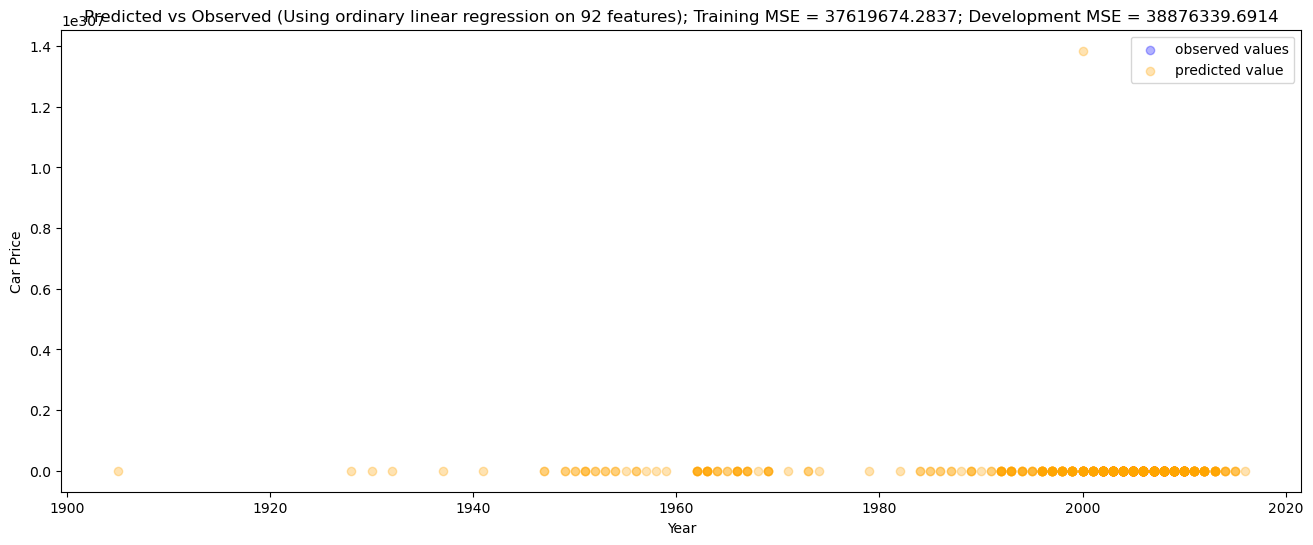

In [57]:
plt.figure(figsize=(16,6))
plt.scatter(X_train['year'], np.exp(y_train), c ="blue", alpha=0.3, label='observed values')
plt.scatter(X_train['year'], np.exp(linear_reg_model1.predict(X_train)), c ="orange", alpha=0.3, label = 'predicted value')
plt.title('Predicted vs Observed (Using ordinary linear regression on 92 features); Training MSE = ' + str(linear_reg_train_mse1) +
          '; Development MSE = ' + str(linear_reg_test_mse1))
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.legend()

# 2. Linear Regression with 50 features


In [58]:
X2 = df_imputed.drop(columns="price")
y2 = np.log(df_imputed["price"])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

In [59]:
df_imputed

,manufacturer,condition,fuel,title_status,transmission,drive,type,state,price,year,cylinders,odometer
3,toyota,excellent,gas,clean,automatic,fwd,sedan,al,4000.0,2002,4.0,155000.0
4,bmw,fair,gas,clean,automatic,rwd,sedan,al,2500.0,1995,6.0,110661.0
5,mazda,excellent,gas,clean,automatic,rwd,convertible,al,9000.0,2008,4.0,56700.0
6,ford,excellent,gas,clean,automatic,fwd,truck,al,8950.0,2011,6.0,164000.0
7,mercedes-benz,fair,gas,clean,automatic,rwd,coupe,al,4000.0,1972,6.0,88100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30226,gmc,good,gas,clean,automatic,4wd,truck,wy,34995.0,2014,8.0,58095.0
30227,toyota,good,gas,clean,automatic,4wd,truck,wy,23995.0,2013,8.0,114215.0
30228,ram,good,gas,clean,automatic,4wd,truck,wy,15999.0,2000,6.0,199090.0
30229,gmc,good,gas,clean,automatic,4wd,truck,wy,24995.0,2014,8.0,128722.0


In [60]:
col_transformer_lr2 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), obj_cols),
    ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=1, include_bias=False), ["cylinders", "odometer", "year"])
])

linear_reg_model2 = Pipeline([
    ('transform', col_transformer_lr2),
    ('scale', StandardScaler()),
    ('linreg', LinearRegression())
])

linear_reg_model2.fit(X_train2, y_train2)

linear_reg_train_mse2= round(mean_squared_error(linear_reg_model2.predict(X_train2), y_train2), 4)
linear_reg_test_mse2=round(mean_squared_error(linear_reg_model2.predict(X_test2), y_test2),4)
linear_reg_EV2 = explained_variance_score(y_train2, linear_reg_model2.predict(X_train2))

train_mse.append(linear_reg_train_mse2)
test_mse.append(linear_reg_test_mse2)
explained_variance.append(linear_reg_EV2)
model.append("Model 2 - Linear Regression")

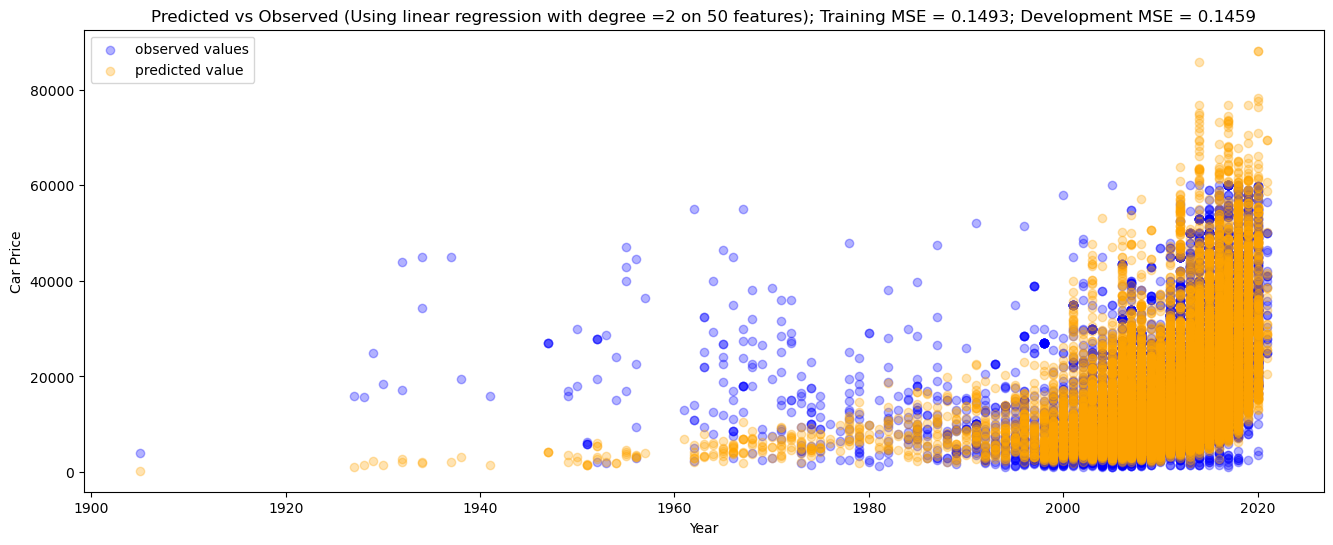

In [61]:
plt.figure(figsize=(16,6))
plt.scatter(X_train2['year'], np.exp(y_train2), c ="blue", alpha=0.3, label='observed values')
plt.scatter(X_train2['year'], np.exp(linear_reg_model2.predict(X_train2)), c ="orange", alpha=0.3, label = 'predicted value')
plt.title('Predicted vs Observed (Using linear regression with degree =2 on 50 features); Training MSE = ' + str(linear_reg_train_mse2) +
          '; Development MSE = ' + str(linear_reg_test_mse2))
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.legend()

# 3. Linear Regression + 50 Features + Polynomial Degree 3

In [38]:
col_transformer_lr3 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), obj_cols),
    ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=3, include_bias=False), ["cylinders", "odometer", "year"])
])

linear_reg_model = Pipeline([
    ('transform', col_transformer_lr3),
    ('scale', StandardScaler()),
    ('linreg', LinearRegression())
])
linear_reg_model.fit(X_train2, y_train2)

linear_reg_train_mse3= round(mean_squared_error(linear_reg_model.predict(X_train2), y_train2), 4)
linear_reg_test_mse3=round(mean_squared_error(linear_reg_model.predict(X_test2), y_test2),4)
linear_reg_EV3= explained_variance_score(y_train2, linear_reg_model.predict(X_train2))

train_mse.append(linear_reg_train_mse3)
test_mse.append(linear_reg_test_mse3)
explained_variance.append(linear_reg_EV3)
model.append("Model 3 - Linear Regression Degree 3")

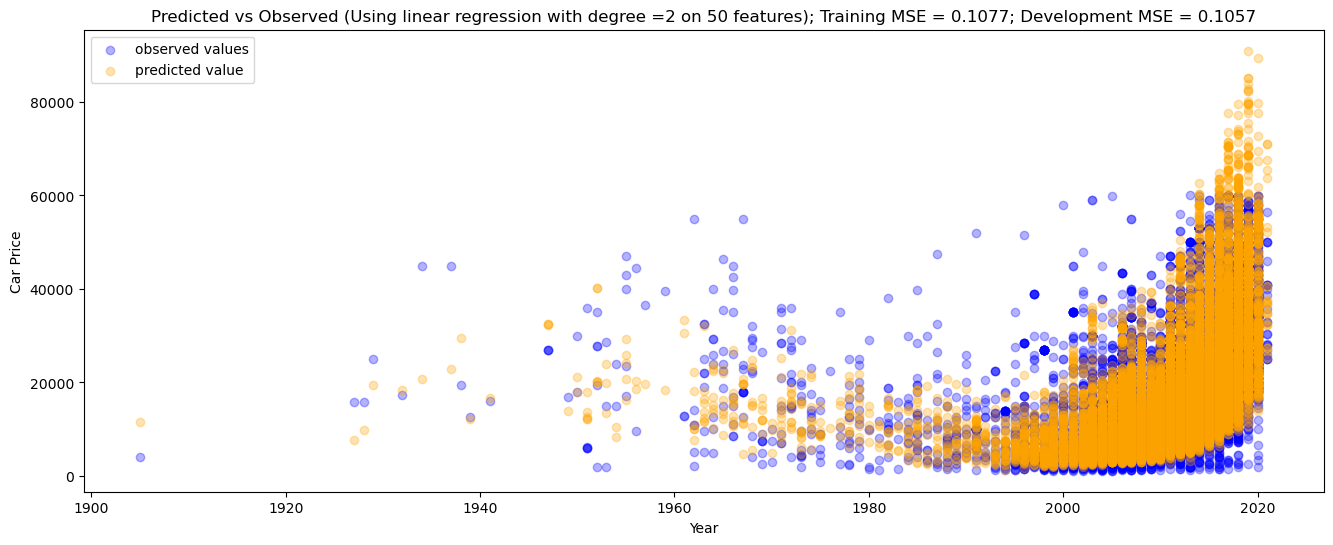

In [39]:
plt.figure(figsize=(16,6))
plt.scatter(X_train2['year'], np.exp(y_train2), c ="blue", alpha=0.3, label='observed values')
plt.scatter(X_train2['year'], np.exp(linear_reg_model.predict(X_train2)), c ="orange", alpha=0.3, label = 'predicted value')
plt.title('Predicted vs Observed (Using linear regression with degree =2 on 50 features); Training MSE = ' + str(linear_reg_train_mse3) +
          '; Development MSE = ' + str(linear_reg_test_mse3))
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.legend()

# 4. Lasso Model

In [62]:
col_transformer_lasso = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), obj_cols),
    ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=3, include_bias=False), ["cylinders", "odometer", "year"])
])

pipe_lasso = Pipeline([
    ('transform', col_transformer_lasso),
    ("scaler", StandardScaler()), 
    ('lasso', Lasso())
])
pipe_lasso.fit(X_train2, y_train2)

lasso_train_mse= round(mean_squared_error(pipe_lasso.predict(X_train2), y_train2), 4)
lasso_test_mse=round(mean_squared_error(pipe_lasso.predict(X_test2), y_test2),4)
lasso_EV= explained_variance_score(y_train2, pipe_lasso.predict(X_train2))

train_mse.append(lasso_train_mse)
test_mse.append(lasso_test_mse)
explained_variance.append(lasso_EV)
model.append("Model 4 - Lasso")

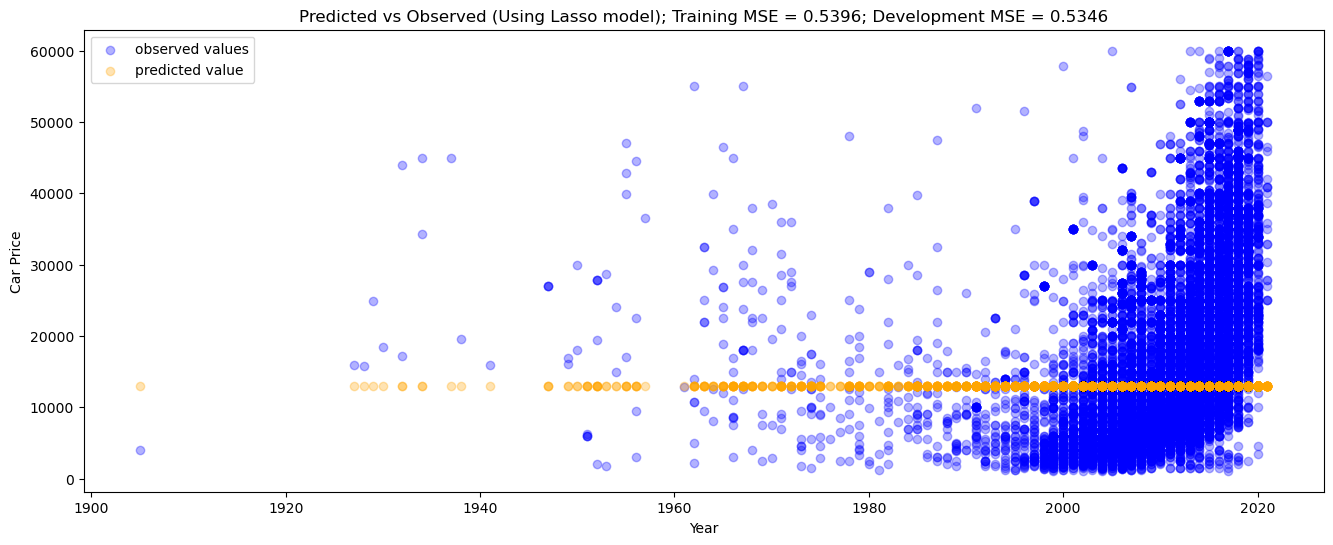

In [63]:
plt.figure(figsize=(16,6))
plt.scatter(X_train2['year'], np.exp(y_train2), c ="blue", alpha=0.3, label='observed values')
plt.scatter(X_train2['year'], np.exp(pipe_lasso.predict(X_train2)), c ="orange", alpha=0.3, label = 'predicted value')
plt.title('Predicted vs Observed (Using Lasso model); Training MSE = ' + str(lasso_train_mse) +
          '; Development MSE = ' + str(lasso_test_mse))
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.legend()

# Ridge Model

In [64]:

alphas = np.linspace(0.1, 100, 50)

randome_state = [10, 100]

params = {"ridge__alpha": alphas, "ridge__random_state": randome_state}


col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), obj_cols),
  #  ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=3, include_bias=False), ["cylinders", "odometer", "year"])
])


pipe = Pipeline([
    ("transformer", col_transformer),
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
    ])

grid_ridge = GridSearchCV(pipe, param_grid=params, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

In [65]:
grid_ridge.fit(X_train2, y_train2)
best_model_ridge = grid_ridge.best_estimator_
best_model_ridge

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'state']),
                                                 ('poly',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ['cylinders', 'odometer',
                                                   'year'])])),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1,

In [66]:
# Find Best Alpha
best_alpha = grid_ridge.best_params_
best_alpha

{'ridge__alpha': 0.1, 'ridge__random_state': 10}

In [67]:
ridge_train_mse = round(mean_squared_error(best_model_ridge.predict(X_train2), y_train2),4)
ridge_test_mse = round(mean_squared_error(best_model_ridge.predict(X_test2), y_test2),4)
ridge_EV= explained_variance_score(y_train2, best_model_ridge.predict(X_train2))

train_mse.append(ridge_train_mse)
test_mse.append(ridge_test_mse)
explained_variance.append(ridge_EV)
model.append("Model 5 - Ridge")

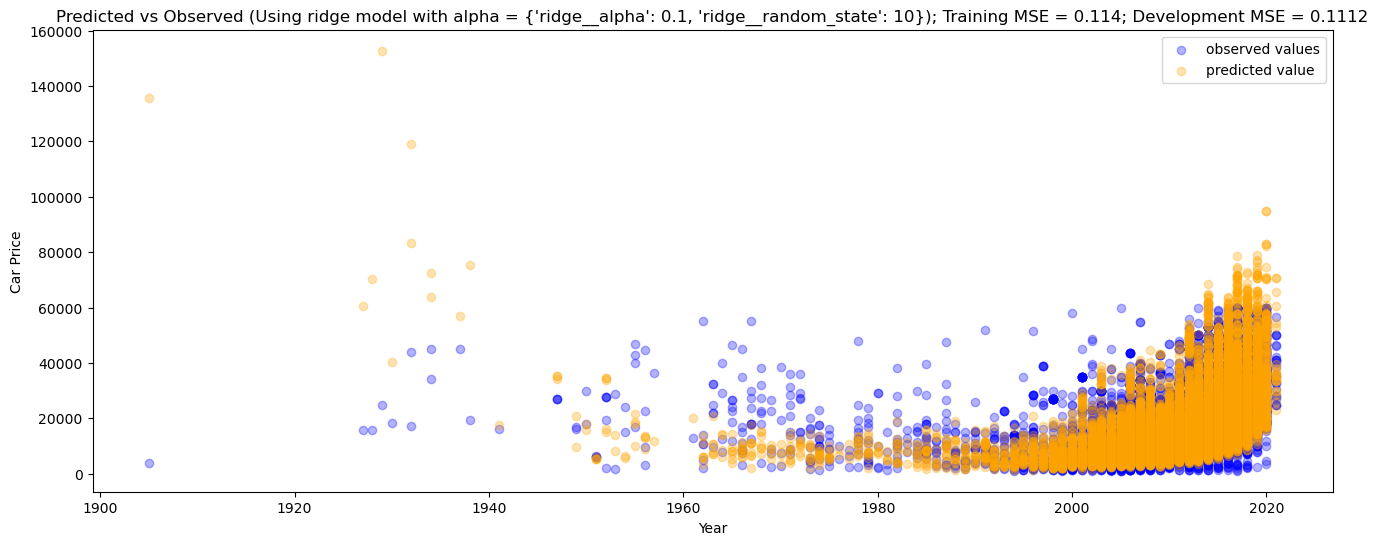

In [68]:
plt.figure(figsize=(16,6))
plt.scatter(X_train2['year'], np.exp(y_train2), c ="blue", alpha=0.3, label='observed values')
plt.scatter(X_train2['year'], np.exp(best_model_ridge.predict(X_train2)), c ="orange", alpha=0.3, label = 'predicted value')
plt.title('Predicted vs Observed (Using ridge model with alpha = ' + str(best_alpha) + '); Training MSE = ' + str(ridge_train_mse) +
          '; Development MSE = ' + str(ridge_test_mse))
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.legend()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [48]:
# Let's analyze the metrics for all the model resultss

results = pd.DataFrame({
    'model': model,
    'train_mse': train_mse,
    'test_mse':test_mse,
    'explained_variance': explained_variance
})

results

,model,train_mse,test_mse,explained_variance
0,Model 1 - Linear Regression,2.681131e+07,2.766631e+07,8.028545e-01
1,Model 2 - Linear Regression,1.484000e-01,1.418000e-01,7.232150e-01
2,Model 3 - Linear Regression Degree 3,1.077000e-01,1.057000e-01,7.990659e-01
3,Model 4 - Lasso,5.360000e-01,5.429000e-01,-4.440892e-16
4,Model 5 - Ridge,1.139000e-01,1.108000e-01,7.875136e-01


In [50]:
# Getting the Score of the Test and Train 

ridge_train_score = round(best_model_ridge.score(X_train2, y_train2), 2)
ridge_test_score = round(best_model_ridge.score(X_test2, y_test2), 2)


print(f"\n\nRidge Train Score: {ridge_train_score}")
print(f"Ridge Test Score: {ridge_test_score}\n\n")



Ridge Train Score: 0.79
Ridge Test Score: 0.8




In [53]:
ridge_value = pd.DataFrame({
    'features': best_model_ridge.named_steps['transformer'].get_feature_names_out(),
    'coefficient': best_model_ridge.named_steps['ridge'].coef_
})

ridge_value['abs_coef'] = np.abs(ridge_value['coefficient'])
ridge_value

,features,coefficient,abs_coef
0,ohe__manufacturer_acura,0.013487,0.013487
1,ohe__manufacturer_alfa-romeo,0.007252,0.007252
2,ohe__manufacturer_audi,0.012881,0.012881
3,ohe__manufacturer_bmw,0.003603,0.003603
4,ohe__manufacturer_buick,-0.005488,0.005488
...,...,...,...
130,poly__cylinders year^2,-1.823077,1.823077
131,poly__odometer^3,0.255484,0.255484
132,poly__odometer^2 year,2.093809,2.093809
133,poly__odometer year^2,4.062264,4.062264


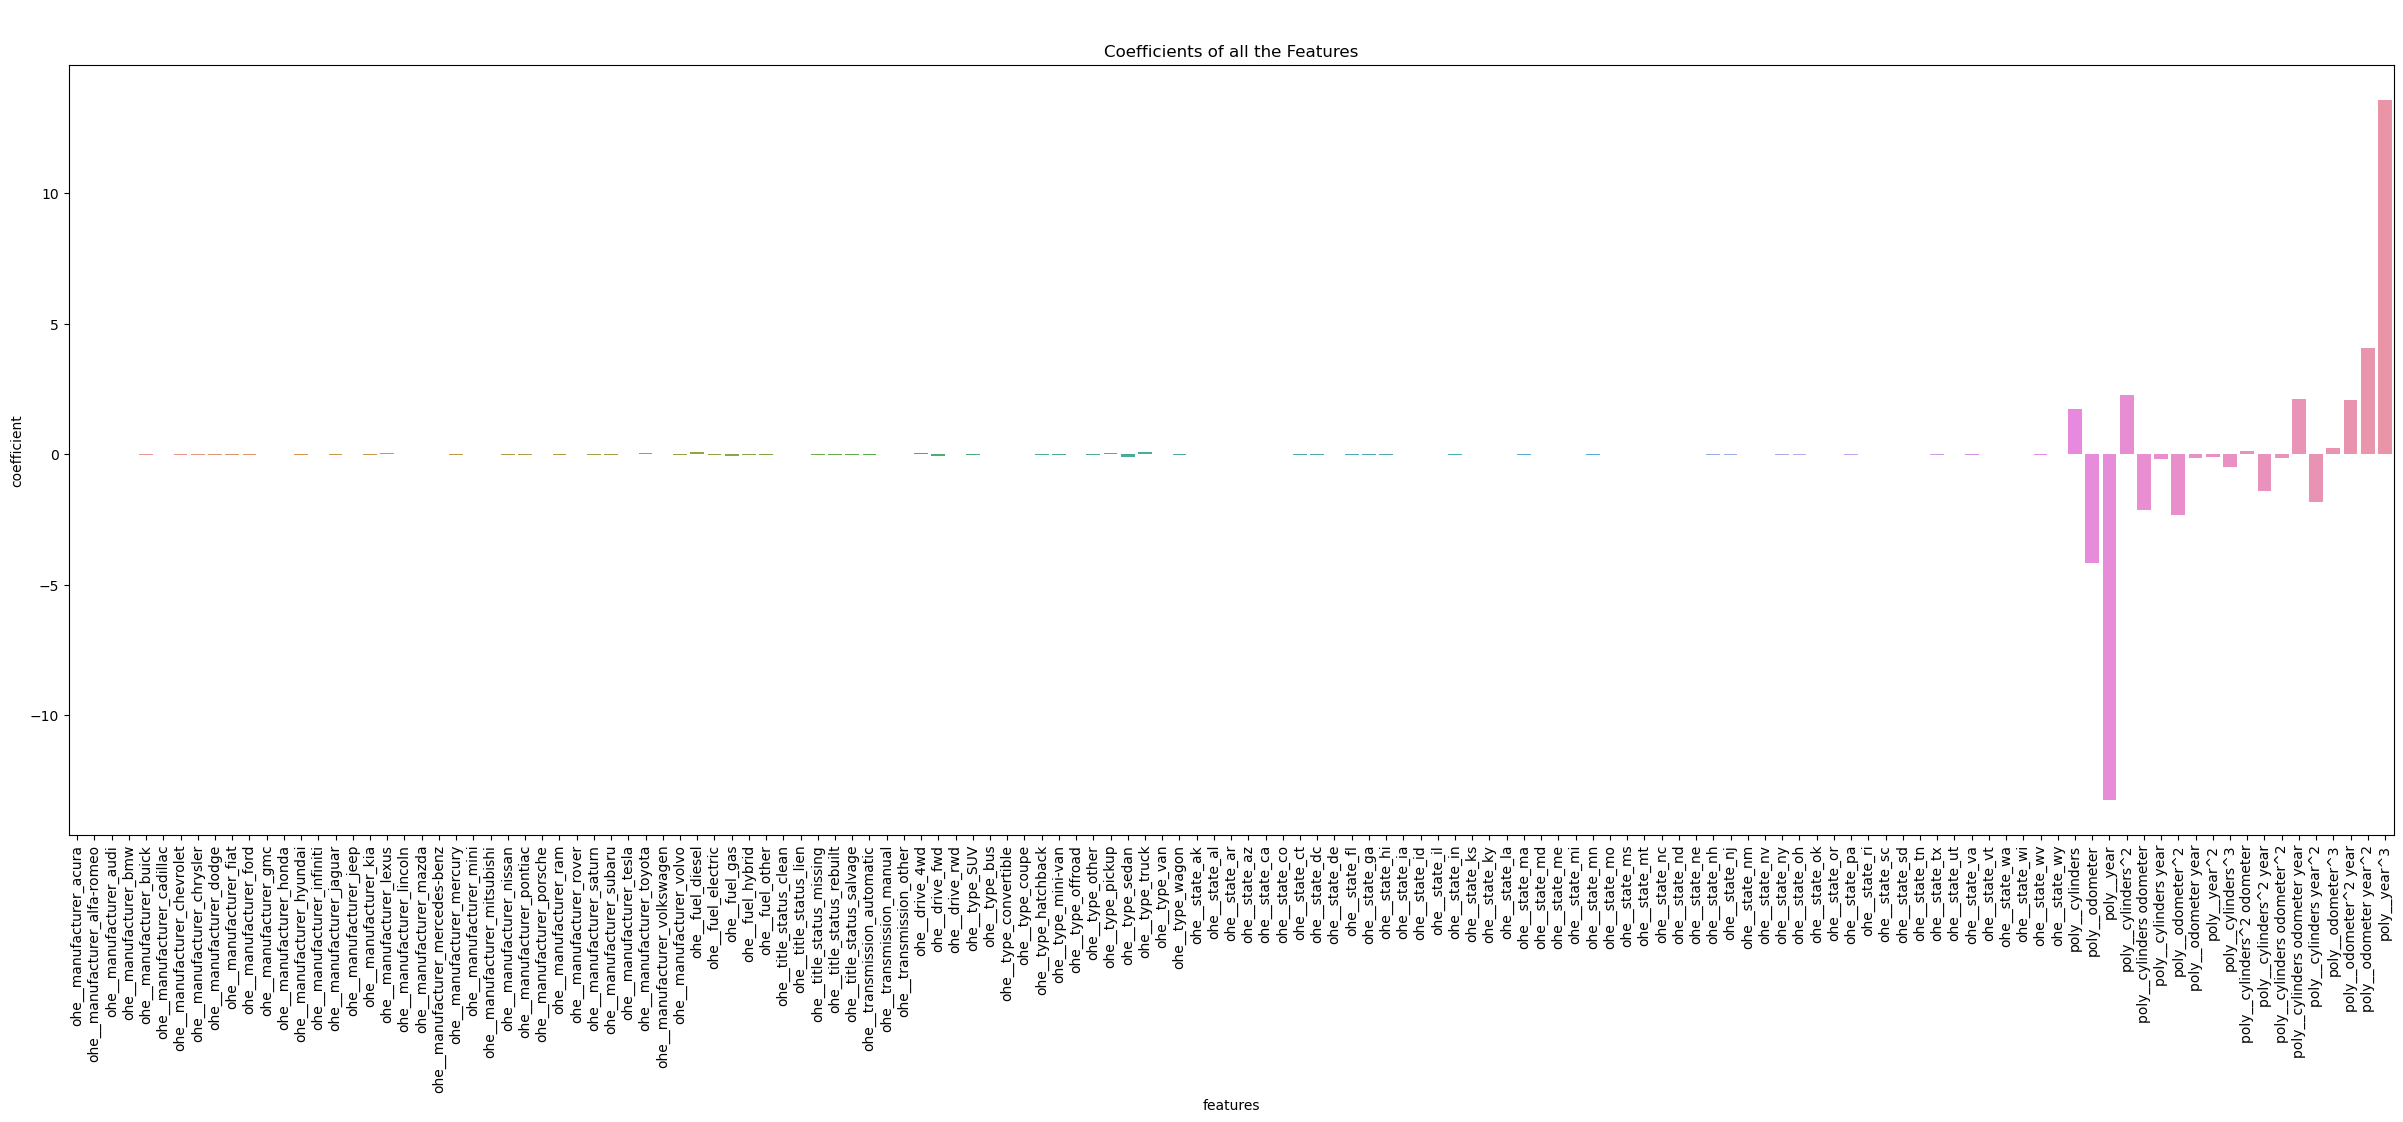

In [55]:
plt.figure(figsize=(30, 10))
sns.barplot(data=ridge_value, x="features", y="coefficient");
plt.title("\n\nCoefficients of all the Features")
plt.xticks(rotation=90);

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Refer https://github.com/Sriworks1/UsedCarPriceAnalysis for the model and deployment